# Model 1

*Author: Liam Ling*

OpenFace feature extraction is done in Google Colab.

Link to the Colab notebook: [Click here](https://colab.research.google.com/drive/1EVXGv7-Fd1QOEvSTtXCIvszrPXx1L4u4?usp=sharing)

Datasets are in Google Drive: [Click here](https://drive.google.com/drive/folders/1cryZ_pzgiwqeNCOoRfbieRLCpivMktjG?usp=sharing)

To restore the datasets in place:
- for FePh: download the Feph/processed and FePh/FePh_labels.csv into ../datasets folder
- for IMPA-FACES3D: download the facesdb/process into ../datasets folder

## FePh Multi-Emotion Labeled Dataset
Ref: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/358QMQ

### Find and Load All the Data Files

In [1]:
import glob
feph_csv = glob.glob("../datasets/FePh/*.csv")
feph_csv

['../datasets/FePh/FePh_labels.csv']

In [2]:
feph_processed = glob.glob("../datasets/FePh/processed/*.csv")
feph_processed

['../datasets/FePh/processed/17January_2011_Monday_tagesschau_default-3.avi_pid0_fn000005-0.csv',
 '../datasets/FePh/processed/07April_2010_Wednesday_heute_default-13.avi_pid0_fn000089-0.csv',
 '../datasets/FePh/processed/25August_2009_Tuesday_tagesschau_default-7.avi_pid0_fn000074-0.csv',
 '../datasets/FePh/processed/25February_2011_Friday_tagesschau_default-15.avi_pid0_fn000011-0.csv',
 '../datasets/FePh/processed/23March_2011_Wednesday_tagesschau_default-8.avi_pid0_fn000029-0.csv',
 '../datasets/FePh/processed/15February_2011_Tuesday_tagesschau_default-0.avi_pid0_fn000104-0.csv',
 '../datasets/FePh/processed/12September_2009_Saturday_tagesschau_default-3.avi_pid0_fn000007-0.csv',
 '../datasets/FePh/processed/04July_2011_Monday_tagesschau_default-11.avi_pid0_fn000055-0.csv',
 '../datasets/FePh/processed/28December_2011_Wednesday_tagesschau_default-5.avi_pid0_fn000113-0.csv',
 '../datasets/FePh/processed/14April_2010_Wednesday_heute_default-4.avi_pid0_fn000048-0.csv',
 '../datasets/Fe

In [3]:
# load data into list
import pandas as pd

processed_list = []

for f in feph_processed:
    processed_list.append(pd.read_csv(f, sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True))

In [4]:
from pathlib import Path

In [5]:
len([f"{Path(f).stem}.png" for f in feph_processed])

3357

In [6]:
all_processed = pd.concat(processed_list)
all_processed

,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0,0.875,-0.045495,0.082465,-0.995555,-0.013811,0.052917,-0.998503,-0.030,0.068,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
0,0,0.875,0.060690,0.045783,-0.997106,-0.097034,0.091841,-0.991035,-0.018,0.069,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
0,0,0.875,0.089500,-0.129100,-0.987584,-0.208121,-0.239531,-0.948320,-0.061,-0.188,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
0,0,0.775,-0.016559,-0.064246,-0.997797,-0.098559,-0.140564,-0.985154,-0.058,-0.103,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
0,0,0.575,-0.136021,-0.013211,-0.990618,-0.216965,0.015195,-0.976061,-0.178,0.001,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0.925,0.143261,0.138722,-0.979914,-0.163127,0.123985,-0.978784,-0.010,0.133,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0,0,0.925,0.048628,-0.047960,-0.997665,-0.178110,0.012349,-0.983933,-0.065,-0.018,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
0,0,0.975,0.282245,0.061415,-0.957375,-0.017496,0.050725,-0.998559,0.135,0.057,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
0,0,0.325,0.127310,-0.190088,-0.973478,-0.005199,-0.195801,-0.980630,0.062,-0.195,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


Some image has two face detected?

In [7]:
for index, data in enumerate(processed_list):
    if len(data) > 1:
        print(index)
        print(feph_processed[index])

2479
../datasets/FePh/processed/02December_2010_Thursday_heute_default-0.avi_pid0_fn000008-0.csv
3181
../datasets/FePh/processed/12January_2011_Wednesday_heute_default-3.avi_pid0_fn000059-0.csv


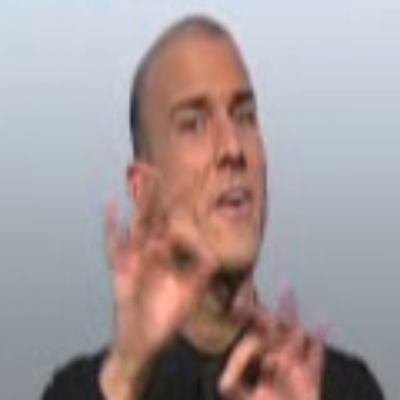

In [8]:
from IPython.display import Image
Image("../datasets/FePh/FePh_images/02December_2010_Thursday_heute_default-0.avi_pid0_fn000008-0.png")

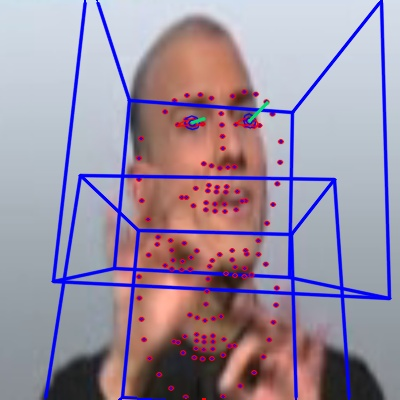

In [9]:
Image("../datasets/FePh/processed/02December_2010_Thursday_heute_default-0.avi_pid0_fn000008-0.jpg")

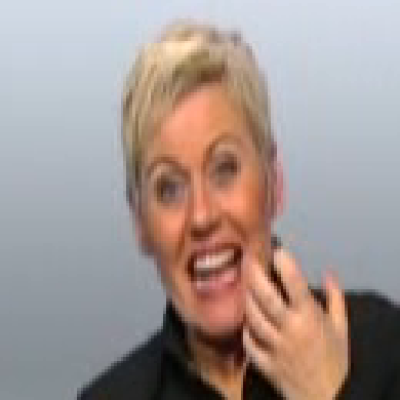

In [10]:
Image("../datasets/FePh/FePh_images/12January_2011_Wednesday_heute_default-3.avi_pid0_fn000059-0.png")

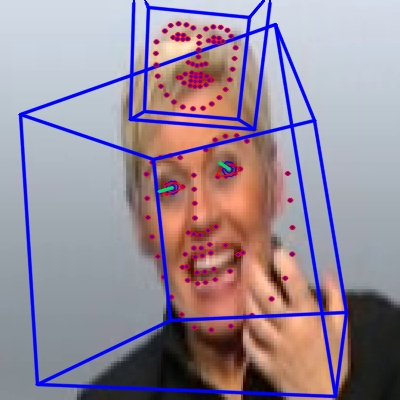

In [11]:
Image("../datasets/FePh/processed/12January_2011_Wednesday_heute_default-3.avi_pid0_fn000059-0.jpg")

### Cleaning

In [12]:
copy_2479 =  processed_list[2479].copy(deep=True)

In [13]:
copy_2479.drop(1)

,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0,0.775,0.189723,0.151749,-0.97004,0.115043,-0.038331,-0.992621,0.154,0.058,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [14]:
processed_list[2479] = copy_2479.drop(1)

In [15]:
copy_3181 =  processed_list[3181].copy(deep=True)

In [16]:
copy_3181.drop(1)

,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0,0.875,-0.116755,0.092235,-0.988869,-0.195871,0.005913,-0.980612,-0.157,0.05,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [17]:
processed_list[3181] = copy_3181.drop(1)

In [18]:
all_processed = pd.concat(processed_list)
all_processed

,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0,0.875,-0.045495,0.082465,-0.995555,-0.013811,0.052917,-0.998503,-0.030,0.068,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
0,0,0.875,0.060690,0.045783,-0.997106,-0.097034,0.091841,-0.991035,-0.018,0.069,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
0,0,0.875,0.089500,-0.129100,-0.987584,-0.208121,-0.239531,-0.948320,-0.061,-0.188,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
0,0,0.775,-0.016559,-0.064246,-0.997797,-0.098559,-0.140564,-0.985154,-0.058,-0.103,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
0,0,0.575,-0.136021,-0.013211,-0.990618,-0.216965,0.015195,-0.976061,-0.178,0.001,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0.925,0.143261,0.138722,-0.979914,-0.163127,0.123985,-0.978784,-0.010,0.133,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0,0,0.925,0.048628,-0.047960,-0.997665,-0.178110,0.012349,-0.983933,-0.065,-0.018,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
0,0,0.975,0.282245,0.061415,-0.957375,-0.017496,0.050725,-0.998559,0.135,0.057,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
0,0,0.325,0.127310,-0.190088,-0.973478,-0.005199,-0.195801,-0.980630,0.062,-0.195,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [19]:
all_processed["External ID"] = [f"{Path(f).stem}.png" for f in feph_processed]

In [20]:
all_processed_cleaned = all_processed.reset_index().drop(["index","face"], axis=1)

In [21]:
all_processed_cleaned

,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,External ID
0,0.875,-0.045495,0.082465,-0.995555,-0.013811,0.052917,-0.998503,-0.030,0.068,158.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,17January_2011_Monday_tagesschau_default-3.avi...
1,0.875,0.060690,0.045783,-0.997106,-0.097034,0.091841,-0.991035,-0.018,0.069,168.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,07April_2010_Wednesday_heute_default-13.avi_pi...
2,0.875,0.089500,-0.129100,-0.987584,-0.208121,-0.239531,-0.948320,-0.061,-0.188,166.7,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,25August_2009_Tuesday_tagesschau_default-7.avi...
3,0.775,-0.016559,-0.064246,-0.997797,-0.098559,-0.140564,-0.985154,-0.058,-0.103,158.1,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,25February_2011_Friday_tagesschau_default-15.a...
4,0.575,-0.136021,-0.013211,-0.990618,-0.216965,0.015195,-0.976061,-0.178,0.001,162.1,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,23March_2011_Wednesday_tagesschau_default-8.av...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,0.925,0.143261,0.138722,-0.979914,-0.163127,0.123985,-0.978784,-0.010,0.133,168.7,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,09December_2009_Wednesday_tagesschau_default-5...
3353,0.925,0.048628,-0.047960,-0.997665,-0.178110,0.012349,-0.983933,-0.065,-0.018,164.1,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,24January_2010_Sunday_tagesschau_default-4.avi...
3354,0.975,0.282245,0.061415,-0.957375,-0.017496,0.050725,-0.998559,0.135,0.057,164.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,30August_2010_Monday_tagesschau_default-9.avi_...
3355,0.325,0.127310,-0.190088,-0.973478,-0.005199,-0.195801,-0.980630,0.062,-0.195,94.6,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,27October_2009_Tuesday_tagesschau_default-2.av...


### Preprocessing

In [22]:
def filter_low_confidence(df, level=0.0):
    return df[df["confidence"] >= level]
all_processed_filtered = filter_low_confidence(all_processed_cleaned, level=0.5)
# after filtering out records have confidence level lower than 0.5
print(all_processed_filtered.shape)

(3156, 711)


So, 3357-3156=201 rows have been removed because of low confidence

We are only going to use AUs as features

In [23]:
all_processed_features = all_processed_filtered[['confidence', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r',
       'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r',
       'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r',
       'AU45_r', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c',
       'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c',
       'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c',
       'AU45_c', 'External ID']]

In [24]:
labels =  pd.read_csv(feph_csv[0])
labels

,External ID,Final_labels,Facial_label,Gender
0,01August_2011_Monday_heute_default-6.avi_pid0_...,anger,1,0
1,01August_2011_Monday_heute_default-6.avi_pid0_...,anger,1,0
2,01August_2011_Monday_heute_default-6.avi_pid0_...,anger,1,0
3,01August_2011_Monday_heute_default-6.avi_pid0_...,anger,1,0
4,01August_2011_Monday_heute_default-6.avi_pid0_...,anger,1,0
...,...,...,...,...
3354,31May_2011_Tuesday_heute_default-14.avi_pid0_f...,none_of_the_above,7,1
3355,31May_2011_Tuesday_tagesschau_default-4.avi_pi...,none_of_the_above,7,1
3356,31May_2011_Tuesday_tagesschau_default-4.avi_pi...,surprise,6,1
3357,31May_2011_Tuesday_tagesschau_default-4.avi_pi...,surprise,6,1


Combine the labels with the selected features

In [25]:
featrues_labels = all_processed_features.merge(labels, on="External ID")
featrues_labels

,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,...,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,External ID,Final_labels,Facial_label,Gender
0,0.875,1.71,0.89,1.43,1.65,0.42,1.81,0.64,1.92,0.00,...,1.0,1.0,1.0,1.0,0.0,1.0,17January_2011_Monday_tagesschau_default-3.avi...,anger,1,0
1,0.875,2.69,2.04,2.03,1.76,0.00,0.80,0.00,0.00,0.12,...,0.0,0.0,1.0,1.0,0.0,0.0,07April_2010_Wednesday_heute_default-13.avi_pi...,anger,1,1
2,0.875,1.37,1.47,1.27,2.15,0.00,0.46,0.00,0.06,0.00,...,0.0,0.0,1.0,1.0,0.0,1.0,25August_2009_Tuesday_tagesschau_default-7.avi...,neutral,0,1
3,0.775,1.91,1.47,1.04,1.27,1.12,1.40,0.00,0.55,1.74,...,0.0,0.0,1.0,1.0,1.0,0.0,25February_2011_Friday_tagesschau_default-15.a...,anger,1,1
4,0.575,0.91,0.00,1.39,0.54,0.00,0.01,0.33,0.89,0.00,...,0.0,0.0,1.0,1.0,0.0,0.0,23March_2011_Wednesday_tagesschau_default-8.av...,anger,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,0.925,1.04,1.12,0.92,2.26,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,1.0,1.0,0.0,0.0,29April_2010_Thursday_heute_default-9.avi_pid0...,surprise,6,1
3142,0.925,3.41,4.19,1.67,3.39,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,1.0,0.0,0.0,09December_2009_Wednesday_tagesschau_default-5...,surprise,6,0
3143,0.925,3.09,1.97,2.15,2.23,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,1.0,1.0,0.0,1.0,24January_2010_Sunday_tagesschau_default-4.avi...,none_of_the_above,7,1
3144,0.975,1.90,2.02,1.69,1.46,0.00,0.00,0.00,0.00,0.63,...,0.0,0.0,1.0,1.0,0.0,0.0,30August_2010_Monday_tagesschau_default-9.avi_...,anger,1,1


In [26]:
set(featrues_labels["Final_labels"].values)

{'None',
 'anger',
 'anger/disgust',
 'anger/fear',
 'anger/neutral',
 'anger/sad',
 'anger/surprise',
 'disgust',
 'disgust/anger',
 'disgust/fear',
 'disgust/sad',
 'disgust/surprise',
 'fear',
 'fear/anger',
 'fear/disgust',
 'fear/sad',
 'fear/surprise',
 'happy',
 'happy/neutral',
 nan,
 'neutral',
 'neutral/anger',
 'neutral/happy',
 'neutral/happy/None',
 'neutral/sad',
 'neutral/surprise',
 'none of the above',
 'none_of_the_above',
 'sad',
 'sad/anger',
 'sad/angry',
 'sad/disgust',
 'sad/fear',
 'sad/neutral',
 'sad/surprise',
 'surprie',
 'surprise',
 'surprise/anger',
 'surprise/disgust',
 'surprise/fear',
 'surprise/neutral',
 'surprise/sad'}

In [27]:
featrues_labels = featrues_labels[featrues_labels["Final_labels"] != "None"]
featrues_labels = featrues_labels[~featrues_labels["Final_labels"].isnull()]
featrues_labels = featrues_labels[featrues_labels["Final_labels"] != "none_of_the_above"]
featrues_labels = featrues_labels[featrues_labels["Final_labels"] != "none of the above"]
featrues_labels = featrues_labels[featrues_labels["Final_labels"] != "neutral/happy/None"]
featrues_labels = featrues_labels.replace("surprie", "surprise")
featrues_labels = featrues_labels.replace("sad/angry", "sad/anger")

In [28]:
featrues_labels

,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,...,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,External ID,Final_labels,Facial_label,Gender
0,0.875,1.71,0.89,1.43,1.65,0.42,1.81,0.64,1.92,0.00,...,1.0,1.0,1.0,1.0,0.0,1.0,17January_2011_Monday_tagesschau_default-3.avi...,anger,1,0
1,0.875,2.69,2.04,2.03,1.76,0.00,0.80,0.00,0.00,0.12,...,0.0,0.0,1.0,1.0,0.0,0.0,07April_2010_Wednesday_heute_default-13.avi_pi...,anger,1,1
2,0.875,1.37,1.47,1.27,2.15,0.00,0.46,0.00,0.06,0.00,...,0.0,0.0,1.0,1.0,0.0,1.0,25August_2009_Tuesday_tagesschau_default-7.avi...,neutral,0,1
3,0.775,1.91,1.47,1.04,1.27,1.12,1.40,0.00,0.55,1.74,...,0.0,0.0,1.0,1.0,1.0,0.0,25February_2011_Friday_tagesschau_default-15.a...,anger,1,1
4,0.575,0.91,0.00,1.39,0.54,0.00,0.01,0.33,0.89,0.00,...,0.0,0.0,1.0,1.0,0.0,0.0,23March_2011_Wednesday_tagesschau_default-8.av...,anger,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,0.875,2.81,3.00,1.16,2.89,0.00,0.00,0.10,0.00,0.00,...,0.0,0.0,1.0,1.0,0.0,1.0,28November_2011_Monday_tagesschau_default-12.a...,anger,1,0
3141,0.925,1.04,1.12,0.92,2.26,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,1.0,1.0,0.0,0.0,29April_2010_Thursday_heute_default-9.avi_pid0...,surprise,6,1
3142,0.925,3.41,4.19,1.67,3.39,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,1.0,0.0,0.0,09December_2009_Wednesday_tagesschau_default-5...,surprise,6,0
3144,0.975,1.90,2.02,1.69,1.46,0.00,0.00,0.00,0.00,0.63,...,0.0,0.0,1.0,1.0,0.0,0.0,30August_2010_Monday_tagesschau_default-9.avi_...,anger,1,1


In [29]:
categories = set()
for item in set(featrues_labels["Final_labels"].values):
    categories.update(item.split("/"))
categories

{'anger', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'}

In [30]:
category_df_data = {item:[] for item in categories}
category_df_data

{'neutral': [],
 'anger': [],
 'happy': [],
 'sad': [],
 'fear': [],
 'surprise': [],
 'disgust': []}

In [31]:
for row in featrues_labels.itertuples():
    key_words = row.Final_labels.split("/")
    for item in categories:
        if item in key_words:
            category_df_data[item].append(1)
        else:
            category_df_data[item].append(0)

In [32]:
pd.DataFrame(category_df_data)

,neutral,anger,happy,sad,fear,surprise,disgust
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
2746,0,1,0,0,0,0,0
2747,0,0,0,0,0,1,0
2748,0,0,0,0,0,1,0
2749,0,1,0,0,0,0,0


In [33]:
featrues_labels = featrues_labels.join(pd.DataFrame(category_df_data, index=featrues_labels.index))

### After Preprocessing

In [34]:
featrues_labels

,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,...,Final_labels,Facial_label,Gender,neutral,anger,happy,sad,fear,surprise,disgust
0,0.875,1.71,0.89,1.43,1.65,0.42,1.81,0.64,1.92,0.00,...,anger,1,0,0,1,0,0,0,0,0
1,0.875,2.69,2.04,2.03,1.76,0.00,0.80,0.00,0.00,0.12,...,anger,1,1,0,1,0,0,0,0,0
2,0.875,1.37,1.47,1.27,2.15,0.00,0.46,0.00,0.06,0.00,...,neutral,0,1,1,0,0,0,0,0,0
3,0.775,1.91,1.47,1.04,1.27,1.12,1.40,0.00,0.55,1.74,...,anger,1,1,0,1,0,0,0,0,0
4,0.575,0.91,0.00,1.39,0.54,0.00,0.01,0.33,0.89,0.00,...,anger,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,0.875,2.81,3.00,1.16,2.89,0.00,0.00,0.10,0.00,0.00,...,anger,1,0,0,1,0,0,0,0,0
3141,0.925,1.04,1.12,0.92,2.26,0.00,0.00,0.00,0.00,0.00,...,surprise,6,1,0,0,0,0,0,1,0
3142,0.925,3.41,4.19,1.67,3.39,0.00,0.00,0.00,0.00,0.00,...,surprise,6,0,0,0,0,0,0,1,0
3144,0.975,1.90,2.02,1.69,1.46,0.00,0.00,0.00,0.00,0.63,...,anger,1,1,0,1,0,0,0,0,0


In [35]:
def find_diff(list_a, list_b):
    # this function finds the difference between list A and list B
    return set(list_a)-set(list_b)

In [36]:
find_diff(all_processed_features["External ID"].values, featrues_labels["External ID"].values)

{'01February_2011_Tuesday_heute_default-8.avi_pid0_fn000018-0.png',
 '01March_2011_Tuesday_tagesschau_default-6.avi_pid0_fn000109-0.png',
 '02June_2010_Wednesday_tagesschau_default-10.avi_pid0_fn000106-0.png',
 '02March_2011_Wednesday_tagesschau_default-7.avi_pid0_fn000064-0.png',
 '02October_2009_Friday_tagesschau_default-12.avi_pid0_fn000139-0.png',
 '03July_2009_Friday_tagesschau_default-3.avi_pid0_fn000109-0.png',
 '03July_2009_Friday_tagesschau_default-3.avi_pid0_fn000110-0.png',
 '03July_2010_Saturday_tagesschau_default-9.avi_pid0_fn000085-0.png',
 '03November_2010_Wednesday_tagesschau_default-6.avi_pid0_fn000205-0.png',
 '03November_2010_Wednesday_tagesschau_default-6.avi_pid0_fn000206-0.png',
 '03November_2010_Wednesday_tagesschau_default-6.avi_pid0_fn000208-0.png',
 '03November_2010_Wednesday_tagesschau_default-6.avi_pid0_fn000209-0.png',
 '05April_2011_Tuesday_heute_default-16.avi_pid0_fn000034-0.png',
 '05July_2010_Monday_tagesschau_default-7.avi_pid0_fn000034-0.png',
 '05Ju

### Use Sklearn Implementation of Classifers

In [37]:
from joblib import dump, load

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
feph_X_r = featrues_labels.iloc[:,1:18]
feph_X_r

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,1.71,0.89,1.43,1.65,0.42,1.81,0.64,1.92,0.00,0.47,1.56,1.40,1.45,1.05,1.31,1.23,0.91
1,2.69,2.04,2.03,1.76,0.00,0.80,0.00,0.00,0.12,0.36,1.10,0.14,0.00,0.00,0.73,0.64,0.96
2,1.37,1.47,1.27,2.15,0.00,0.46,0.00,0.06,0.00,0.00,0.13,0.29,0.00,0.35,0.85,2.21,0.00
3,1.91,1.47,1.04,1.27,1.12,1.40,0.00,0.55,1.74,1.86,0.00,0.00,0.00,0.09,2.28,2.10,0.00
4,0.91,0.00,1.39,0.54,0.00,0.01,0.33,0.89,0.00,0.00,1.11,0.00,0.00,0.00,0.88,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,2.81,3.00,1.16,2.89,0.00,0.00,0.10,0.00,0.00,0.00,1.34,0.00,0.00,0.00,1.90,1.50,0.00
3141,1.04,1.12,0.92,2.26,0.00,0.00,0.00,0.00,0.00,0.00,1.15,0.00,0.00,0.00,2.11,1.57,0.00
3142,3.41,4.19,1.67,3.39,0.00,0.00,0.00,0.00,0.00,0.00,1.08,0.60,0.00,0.00,1.02,0.78,0.01
3144,1.90,2.02,1.69,1.46,0.00,0.00,0.00,0.00,0.63,0.00,0.00,0.10,0.43,0.00,1.13,2.30,0.00


In [40]:
feph_X_c = featrues_labels.iloc[:,18:36]
feph_X_c

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3141,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3142,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3144,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [41]:
feph_y = featrues_labels.iloc[:,-7:]
feph_y

,neutral,anger,happy,sad,fear,surprise,disgust
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
3140,0,1,0,0,0,0,0
3141,0,0,0,0,0,1,0
3142,0,0,0,0,0,1,0
3144,0,1,0,0,0,0,0


Multilabel

In [42]:
feph_X_r_train, feph_X_r_test, feph_y_train, feph_y_test = train_test_split(feph_X_r, feph_y, test_size=0.33, random_state=98)
feph_X_c_train, feph_X_c_test, feph_y_train, feph_y_test = train_test_split(feph_X_c, feph_y, test_size=0.33, random_state=98)

Try AU_r first

In [43]:
from sklearn.decomposition import PCA
import numpy as np

In [44]:
can_n_components = range(1, 18, 1)
ratios = []
for n in can_n_components:
    pca = PCA(n_components=n)
    feph_X_r_pca = pca.fit_transform(feph_X_r)
    ratios.append(np.sum(pca.explained_variance_ratio_))

In [45]:
from matplotlib import pyplot as plt

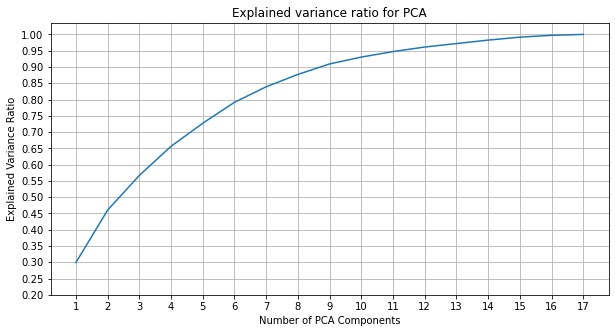

In [46]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(can_n_components, ratios)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained variance ratio for PCA')
plt.yticks(np.arange(0.2, 1.05, .05))
plt.xticks(np.arange(1, 18, 1));

Let's choose 95% explained variance ratio, so n = 11

In [47]:
n = 11
pca_r = PCA(n_components=n, svd_solver='randomized', whiten=True).fit(feph_X_r_train)
feph_X_r_train_pca = pca_r.transform(feph_X_r_train)
feph_X_r_test_pca = pca_r.transform(feph_X_r_test)

#### Try SVM

On AU_r

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC

In [49]:
print("Searching the best parameters for SVC...")
param_grid = {
    "estimator__C": np.arange(10,100,20),
    "estimator__gamma": [0.0001, 0.0005, 0.001, 0.005, 0.0025, 0.01],
    "estimator__class_weight": [None, "balanced"],
    "estimator__decision_function_shape": ["ovo", "ovr"],
    "estimator__probability": [True, False]
}
svm_feph_aur_clf = GridSearchCV(
    MultiOutputClassifier(
        SVC()
    ), 
    param_grid, 
    verbose=1, 
    n_jobs=6
)
svm_feph_aur_clf = svm_feph_aur_clf.fit(feph_X_r_train_pca, feph_y_train)
print(f"Best parameters for SVC: {svm_feph_aur_clf.best_params_}")

Searching the best parameters for SVC...
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   23.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  5.0min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  9.2min
[Parallel(n_jobs=6)]: Done 1200 out of 1200 | elapsed: 14.5min finished


Best parameters for SVC: {'estimator__C': 90, 'estimator__class_weight': None, 'estimator__decision_function_shape': 'ovo', 'estimator__gamma': 0.01, 'estimator__probability': True}


In [50]:
svm_feph_aur_clf.best_estimator_.score(feph_X_r_test_pca, feph_y_test)

0.22356828193832598

In [51]:
dump(svm_feph_aur_clf, 'svm_feph_aur_clf.joblib')

['svm_feph_aur_clf.joblib']

On AU_c

In [52]:
can_n_components = range(1, 18, 1)
ratios = []
for n in can_n_components:
    pca = PCA(n_components=n)
    feph_X_c_pca = pca.fit_transform(feph_X_r)
    ratios.append(np.sum(pca.explained_variance_ratio_))

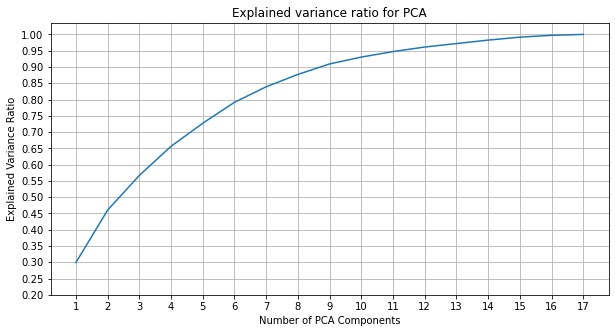

In [53]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(can_n_components, ratios)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained variance ratio for PCA')
plt.yticks(np.arange(0.2, 1.05, .05))
plt.xticks(np.arange(1, 18, 1));

In [54]:
n = 11
pca_c = PCA(n_components=n, svd_solver='randomized', whiten=True).fit(feph_X_c_train)
feph_X_c_train_pca = pca_c.transform(feph_X_c_train)
feph_X_c_test_pca = pca_c.transform(feph_X_c_test)

In [55]:
print("Searching the best parameters for SVC...")
param_grid = {
    "estimator__C": np.arange(10,100,20),
    "estimator__gamma": [0.0001, 0.0005, 0.001, 0.005, 0.0025, 0.01],
    "estimator__class_weight": [None, "balanced"],
    "estimator__decision_function_shape": ["ovo", "ovr"],
    "estimator__probability": [True, False]
}
svm_feph_auc_clf = GridSearchCV(
    MultiOutputClassifier(
        SVC()
    ), 
    param_grid, 
    verbose=1, 
    n_jobs=6
)
svm_feph_auc_clf = svm_feph_auc_clf.fit(feph_X_c_train_pca, feph_y_train)
print(f"Best parameters for SVC: {svm_feph_auc_clf.best_params_}")

Searching the best parameters for SVC...
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   19.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  5.2min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  9.8min
[Parallel(n_jobs=6)]: Done 1200 out of 1200 | elapsed: 15.9min finished


Best parameters for SVC: {'estimator__C': 90, 'estimator__class_weight': None, 'estimator__decision_function_shape': 'ovo', 'estimator__gamma': 0.01, 'estimator__probability': True}


In [56]:
svm_feph_auc_clf.best_estimator_.score(feph_X_c_test_pca, feph_y_test)

0.25

In [57]:
dump(svm_feph_auc_clf, 'svm_feph_auc_clf.joblib')

['svm_feph_auc_clf.joblib']

#### Try KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

On AU_r

In [59]:
print("Searching the best parameters for KNN...")
param_grid = {
    "estimator__n_neighbors": np.arange(1,15,2),
    "estimator__weights": ["uniform", "distance"],
    "estimator__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "estimator__leaf_size": np.arange(1,15,2),
    "estimator__p": [1, 2]
}
knn_feph_aur_clf = GridSearchCV(
    MultiOutputClassifier(
        KNeighborsClassifier()
    ), 
    param_grid, 
    verbose=1, 
    n_jobs=6
)
knn_feph_aur_clf = knn_feph_aur_clf.fit(feph_X_r_train_pca, feph_y_train)
print(f"Best parameters for SVC: {knn_feph_aur_clf.best_params_}")

Searching the best parameters for KNN...
Fitting 5 folds for each of 784 candidates, totalling 3920 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.3s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   51.8s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  3.9min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  5.9min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:  7.1min
[Parallel(n_jobs=6)]: Done 3920 out of 3920 | elapsed:  7.8min finished


Best parameters for SVC: {'estimator__algorithm': 'auto', 'estimator__leaf_size': 1, 'estimator__n_neighbors': 1, 'estimator__p': 2, 'estimator__weights': 'uniform'}


In [60]:
knn_feph_aur_clf.best_estimator_.score(feph_X_r_test_pca, feph_y_test)

0.48237885462555063

In [61]:
dump(knn_feph_aur_clf, 'knn_feph_aur_clf.joblib')

['knn_feph_aur_clf.joblib']

On AU_c

In [63]:
print("Searching the best parameters for KNN...")
param_grid = {
    "estimator__n_neighbors": np.arange(1,15,2),
    "estimator__weights": ["uniform", "distance"],
    "estimator__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "estimator__leaf_size": np.arange(1,15,2),
    "estimator__p": [1, 2]
}
knn_feph_auc_clf = GridSearchCV(
    MultiOutputClassifier(
        KNeighborsClassifier()
    ), 
    param_grid, 
    verbose=1, 
    n_jobs=6
)
knn_feph_auc_clf = knn_feph_auc_clf.fit(feph_X_c_train_pca, feph_y_train)
print(f"Best parameters for SVC: {knn_feph_auc_clf.best_params_}")

Searching the best parameters for KNN...
Fitting 5 folds for each of 784 candidates, totalling 3920 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   25.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   49.4s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:  4.5min


Best parameters for SVC: {'estimator__algorithm': 'ball_tree', 'estimator__leaf_size': 13, 'estimator__n_neighbors': 1, 'estimator__p': 1, 'estimator__weights': 'uniform'}


[Parallel(n_jobs=6)]: Done 3920 out of 3920 | elapsed:  5.2min finished


In [64]:
knn_feph_auc_clf.best_estimator_.score(feph_X_c_test_pca, feph_y_test)

0.236784140969163

In [65]:
dump(knn_feph_auc_clf, 'knn_feph_auc_clf.joblib')

['knn_feph_auc_clf.joblib']

Try boost KNN with scaler that uses AU_r data

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline

Best parameters for SVC: {'estimator__algorithm': 'auto', 'estimator__leaf_size': 1, 'estimator__n_neighbors': 1, 'estimator__p': 2, 'estimator__weights': 'uniform'}

In [67]:
names = [
    "Stander-KNN",
    "MinMax-KNN",
    "Robust-KNN"
]
scaler_knn_aur_clfs = [
    make_pipeline(
        StandardScaler(),
        KNeighborsClassifier(
            algorithm="auto",
            leaf_size=1,
            n_neighbors=1,
            p=2,
            weights="uniform"
        )
    ),
    make_pipeline(
        MinMaxScaler(),
        KNeighborsClassifier(
            algorithm="auto",
            leaf_size=1,
            n_neighbors=1,
            p=2,
            weights="uniform"
        )
    ),
    make_pipeline(
        RobustScaler(),
        KNeighborsClassifier(
            algorithm="auto",
            leaf_size=1,
            n_neighbors=1,
            p=2,
            weights="uniform"
        )
    )
]

In [69]:
scaler_knn_aur_clf_clc = {}
for name, clf in zip(names, scaler_knn_aur_clfs):
    clf = clf.fit(feph_X_r_train_pca, feph_y_train)
    score = clf.score(feph_X_r_test_pca, feph_y_test)
    scaler_knn_aur_clf_clc.update(
        {
            name:{
                "clf":clf,
                "score":score
            }
        }
    )
scaler_knn_aur_clf_clc

{'Stander-KNN': {'clf': Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('kneighborsclassifier',
                   KNeighborsClassifier(leaf_size=1, n_neighbors=1))]),
  'score': 0.48237885462555063},
 'MinMax-KNN': {'clf': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                  ('kneighborsclassifier',
                   KNeighborsClassifier(leaf_size=1, n_neighbors=1))]),
  'score': 0.4801762114537445},
 'Robust-KNN': {'clf': Pipeline(steps=[('robustscaler', RobustScaler()),
                  ('kneighborsclassifier',
                   KNeighborsClassifier(leaf_size=1, n_neighbors=1))]),
  'score': 0.48237885462555063}}

This is not really helping...

#### Try MLP
Ref: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [70]:
feph_X_r_train.shape

(1843, 17)

In [71]:
feph_y_train

,neutral,anger,happy,sad,fear,surprise,disgust
396,0,0,0,0,0,1,0
2114,0,1,0,0,0,0,0
1047,0,0,0,1,0,0,0
1441,0,0,0,0,1,0,1
602,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
78,0,0,0,0,1,0,0
2404,0,0,0,0,0,0,1
2286,0,1,0,0,0,0,0
701,0,1,0,0,1,0,0


Nh=Ns(α∗(Ni+No))

- Ni = number of input neurons.
- No = number of output neurons.
- Ns = number of samples in training data set.
- α = an arbitrary scaling factor usually 2-10.

1843*(2*(17+7)) = 88464

That's too much perceptrons.. I don't have that much memory.. Let's try something casual

In [72]:
from sklearn.neural_network import MLPClassifier

In [83]:
print("Searching the best parameters for MLP...")
param_grid = {
    "estimator__activation": ["identity", "logistic", "tanh", "relu"],
    "estimator__solver": ["lbfgs", "sgd", "adam"],
    "estimator__alpha": np.arange(0.00001,0.001,0.0005),
    "estimator__beta_1": np.arange(0.1,0.9,0.8),
    "estimator__beta_2": np.arange(0.1,0.9,0.8),
    "estimator__hidden_layer_sizes": [(500,500,500,500)],
    "estimator__learning_rate": ["constant", "invscaling", "adaptive"],
}
mlp_feph_aur_clf = GridSearchCV(
    MultiOutputClassifier(
        MLPClassifier(max_iter=20000)
    ), 
    param_grid, 
    verbose=1, 
    n_jobs=6
)
mlp_feph_aur_clf = mlp_feph_aur_clf.fit(feph_X_r_train_pca, feph_y_train)
print(f"Best parameters for SVC: {mlp_feph_aur_clf.best_params_}")

Searching the best parameters for MLP...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


KeyboardInterrupt: 

In [ ]:
mlp_feph_aur_clf.best_estimator_.score(feph_X_r_test_pca, feph_y_test)

In [ ]:
dump(mlp_feph_aur_clf, 'mlp_feph_aur_clf.joblib')

In [ ]:
print("Searching the best parameters for MLP...")
param_grid = {
    "estimator__activation": ["identity", "logistic", "tanh", "relu"],
    "estimator__alpha": np.arange(0.0000001,0.001,0.0002),
    "estimator__beta_1": np.arange(0,0.9,0.1),
    "estimator__beta_2": np.arange(0,0.9,0.1),
    "estimator__hidden_layer_sizes": [(500,500,500,500)],
    "estimator__learning_rate": ["constant", "invscaling", "adaptive"],
    "estimator__max_iter": [20000]
}
mlp_feph_auc_clf = GridSearchCV(
    MultiOutputClassifier(
        MLPClassifier()
    ), 
    param_grid, 
    verbose=1, 
    n_jobs=6
)
mlp_feph_auc_clf = mlp_feph_auc_clf.fit(feph_X_c_train_pca, feph_y_train)
print(f"Best parameters for SVC: {mlp_feph_auc_clf.best_params_}")

In [ ]:
mlp_feph_auc_clf.best_estimator_.score(feph_X_c_test_pca, feph_y_test)

In [ ]:
dump(mlp_feph_auc_clf, 'mlp_feph_auc_clf.joblib')